# Laptop Price Predictor

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("laptop_price.csv", encoding="latin-1")
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [24]:
data = data.drop("Product", axis=1)
data.head(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [26]:
company_dummies = pd.get_dummies(data["Company"], dtype=int)
data = pd.concat([data, company_dummies], axis=1)
print(data.columns)

Index(['laptop_ID', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Acer',
       'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei',
       'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung',
       'Toshiba', 'Vero', 'Xiaomi'],
      dtype='object')


In [28]:
data = data.drop("Company", axis=1)

In [30]:
data.head(5)

,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0


In [36]:
typename_dummies = pd.get_dummies(data["TypeName"], dtype=int)
data = pd.concat([data, typename_dummies], axis=1)

In [38]:
data = data.drop("TypeName", axis=1)

In [40]:
data.head(5)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data["ScreenResolution"] = data.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
data["ScreenWidth"] = data.ScreenResolution.str.split("x").apply(lambda x: x[0])
data["ScreenHeight"] = data.ScreenResolution.str.split("x").apply(lambda x: x[1])
data.head(1)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,1,0,2560,1600


In [56]:
data = data.drop("ScreenResolution", axis=1)
data.head(1)

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,0,0,1,0,2560,1600


In [58]:
data["Cpu Brand"] = data.Cpu.str.split(" ").apply(lambda x: x[0])
data["Cpu Frequency"] = data.Cpu.str.split(" ").apply(lambda x: x[-1])
data.head(1)

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [60]:
data = data.drop("Cpu", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [62]:
data["Cpu Frequency"] = data["Cpu Frequency"].str[:-3]
data["Cpu Frequency"]

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu Frequency, Length: 1303, dtype: object

In [64]:
data["Ram"] = data["Ram"].str[:-2]
data["Ram"]

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [66]:
data["Ram"] = data["Ram"].astype("int")
data["Cpu Frequency"] = data["Cpu Frequency"].astype("float")
data["ScreenWidth"] = data["ScreenWidth"].astype("int")
data["ScreenHeight"] = data["ScreenHeight"].astype("int")

In [68]:
data.head(1)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3


array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Acer'}>,
        <Axes: title={'center': 'Apple'}>],
       [<Axes: title={'center': 'Asus'}>,
        <Axes: title={'center': 'Chuwi'}>,
        <Axes: title={'center': 'Dell'}>,
        <Axes: title={'center': 'Fujitsu'}>,
        <Axes: title={'center': 'Google'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Huawei'}>,
        <Axes: title={'center': 'LG'}>,
        <Axes: title={'center': 'Lenovo'}>,
        <Axes: title={'center': 'MSI'}>,
        <Axes: title={'center': 'Mediacom'}>,
        <Axes: title={'center': 'Microsoft'}>],
       [<Axes: title={'center': 'Razer'}>,
        <Axes: title={'center': 'Samsung'}>,
        <Axes: title={'center': 'Toshiba'}>,
        <Axes: title={'center': 'Vero'}>,
        <Axes: title={'center': 'Xiaom

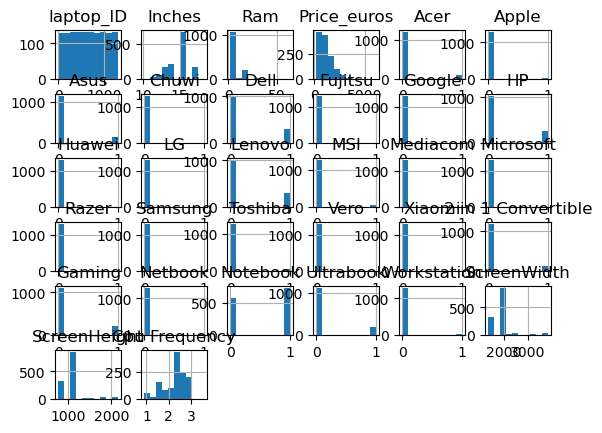

In [70]:
data.hist()

In [72]:
data["Memory Amount"] = data.Memory.str.split(" ").apply(lambda x: x[0])
data["Memory Type"] = data.Memory.str.split(" ").apply(lambda x: x[1])

In [74]:
data["Memory Type"].value_counts()

Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

In [78]:
data["Memory Amount"].value_counts()

Memory Amount
256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [84]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [86]:
data["Memory Amount"] = data["Memory Amount"].apply(turn_memory_into_MB)

In [88]:
data["Memory Amount"].value_counts()

Memory Amount
256000.0     508
1000000.0    250
128000.0     177
512000.0     140
500000.0     132
32000.0       45
64000.0       17
2000000.0     16
16000.0       10
180000.0       5
240000.0       1
8000.0         1
508000.0       1
Name: count, dtype: int64

In [90]:
data = data.drop("Memory", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD


In [92]:
data["Weight"] = data["Weight"].str[:-2]

In [94]:
data["Weight"] = data["Weight"].astype("float")
data["Weight"]

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [96]:
data["Gpu Brand"] = data.Gpu.str.split(" ").apply(lambda x: x[0])

In [98]:
data["Gpu Brand"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu Brand, Length: 1303, dtype: object

In [102]:
data = data.drop("Gpu", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type,Gpu Brand
0,1,13.3,8,macOS,1.37,1339.69,0,1,0,0,...,0,1,0,2560,1600,Intel,2.3,128000.0,SSD,Intel


In [112]:
opsys_dummies = pd.get_dummies(data["OpSys"], dtype=int)
data = pd.concat([data, opsys_dummies], axis=1)
data.head(1)

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Xiaomi,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,macOS,1.37,1339.69,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
data = data.drop("OpSys", axis=1)
data.head(1)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Xiaomi,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
data["Cpu Brand"]

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: Cpu Brand, Length: 1303, dtype: object

In [118]:
cpu_categories = pd.get_dummies(data["Cpu Brand"], dtype=int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
data = pd.concat([data, cpu_categories], axis=1)

In [120]:
data.head(2)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [122]:
data = data.drop("Cpu Brand", axis=1)

In [126]:
data["Gpu Brand"]

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu Brand, Length: 1303, dtype: object

In [128]:
gpu_categories = pd.get_dummies(data["Gpu Brand"], dtype=int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
data = pd.concat([data, gpu_categories], axis=1)

In [130]:
data.head(2)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [132]:
data = data.drop("Gpu Brand", axis=1)

In [134]:
data.columns

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'ScreenWidth', 'ScreenHeight',
       'Cpu Frequency', 'Memory Amount', 'Memory Type', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', 'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu',
       'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom',
       'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi', 'Android',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'AMD_CPU', 'Intel_CPU', 'Samsung_CPU', 'AMD_GPU',
       